# Car Auction Data Analysis Project

# Section 1: Loading and cleaning the CSV Data File

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
# Custom KMeans class has been created, and can now be used for clustering
src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)
from kmeans import CustomKMeans, plot_clusters

# Import the cleaned data for use in the project
cleaned_data_path = os.path.abspath(os.path.join('..', 'data', 'cleaned', 'car_prices_cleaned.csv'))
car_df = pd.read_csv(cleaned_data_path)
car_df.head(5)

fordpickup = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'ford_pickup.csv'))
camry = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'toyota_camry.csv'))
altima = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'nissan_altima.csv'))

onefifty_df = pd.read_csv(fordpickup)
camry_df = pd.read_csv(camry)
altima_df = pd.read_csv(altima)


In [3]:
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472336 entries, 0 to 472335
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   vin           472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   odometer      472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  mmr           472336 non-null  int64  
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 57.7+ MB
None


In [4]:
print(onefifty_df.info())
print(altima_df.info())
print(camry_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, Week to 2015-05-31
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category: All categories  76 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, Week to 2015-05-31
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category: All categories  76 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, Week to 2015-05-31
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category: All categories  76 non-null     object
dtypes: object(1)
memory usage: 1.2+ KB
None


## Initial Exploratory Questions

#### We each came up with a few exploratory questions in order to get a better idea of what the data is like that we are working with

In [5]:
#What is the average selling price?
price_avg = car_df['sellingprice'].mean()
print(f"The average selling price is: {price_avg:.2f}")


The average selling price is: 13690.40


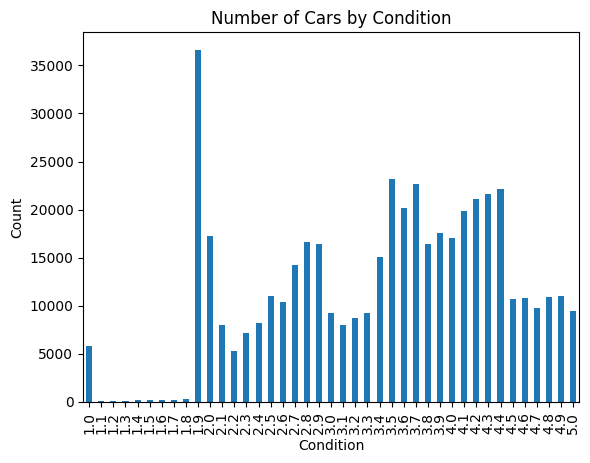

In [6]:
# Get the value counts of 'condition' and sort by ascending order
condition_counts = car_df['condition'].value_counts().sort_index()

# Plot the sorted data
condition_counts.plot(kind='bar', title='Number of Cars by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

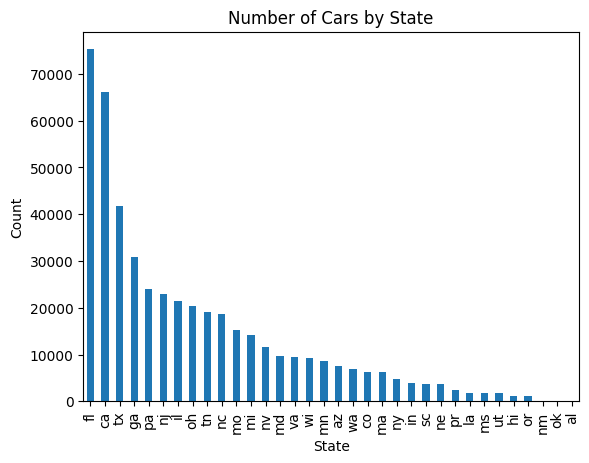

In [7]:
# What is the number of cars in each state?
car_df['state'].value_counts().plot(kind='bar', title='Number of Cars by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

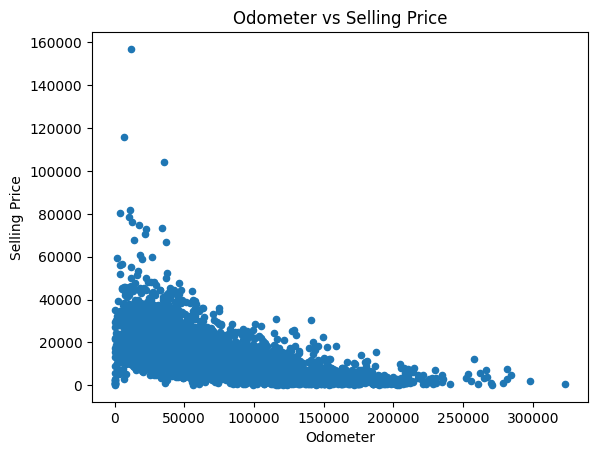

In [8]:
# What is the correlation between odometer and the selling price
car_df_sampled = car_df[car_df['odometer'] < 500000].sample(5000, random_state=50)
# Due to the dataset having about 500,000 rows the plot was too large, so a smaller sample size was used to increase readability
car_df_sampled.plot.scatter(x='odometer', y = 'sellingprice', title = 'Odometer vs Selling Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

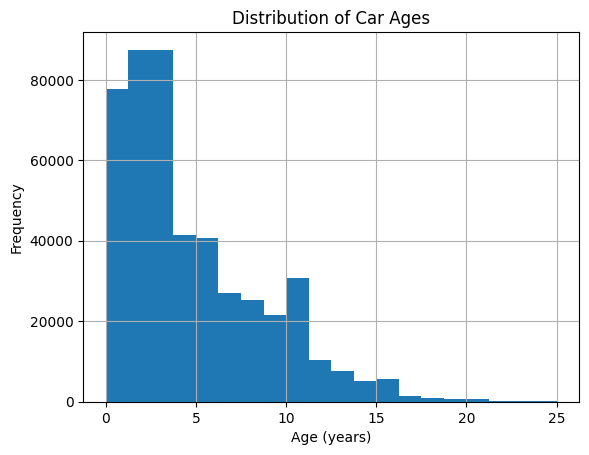

In [9]:
# What is the distribution of car ages? 
car_df['car_age'] = 2015 - car_df['year']
car_df['car_age'].hist(bins = 20)
plt.title('Distribution of Car Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

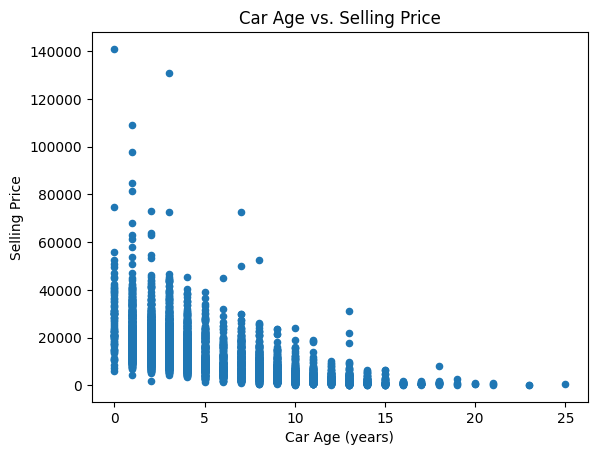

In [10]:
# What is the relationship between car age and selling price?
car_df_sampled = car_df.sample(5000, random_state= 50)
car_df_sampled.plot.scatter(x = 'car_age', y = 'sellingprice', title = 'Car Age vs. Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

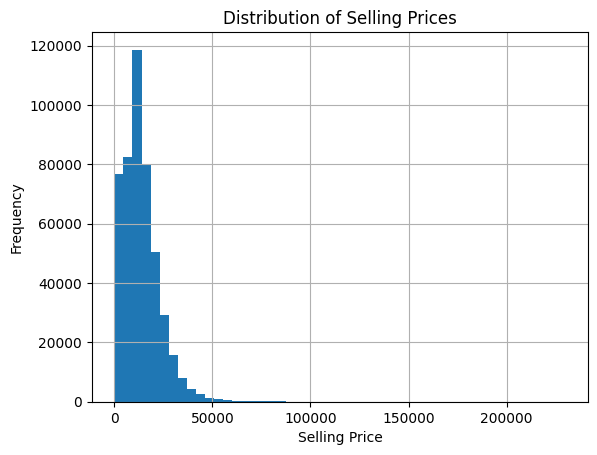

In [11]:
# What is the average mileage by make?
car_df['sellingprice'].hist(bins = 50)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


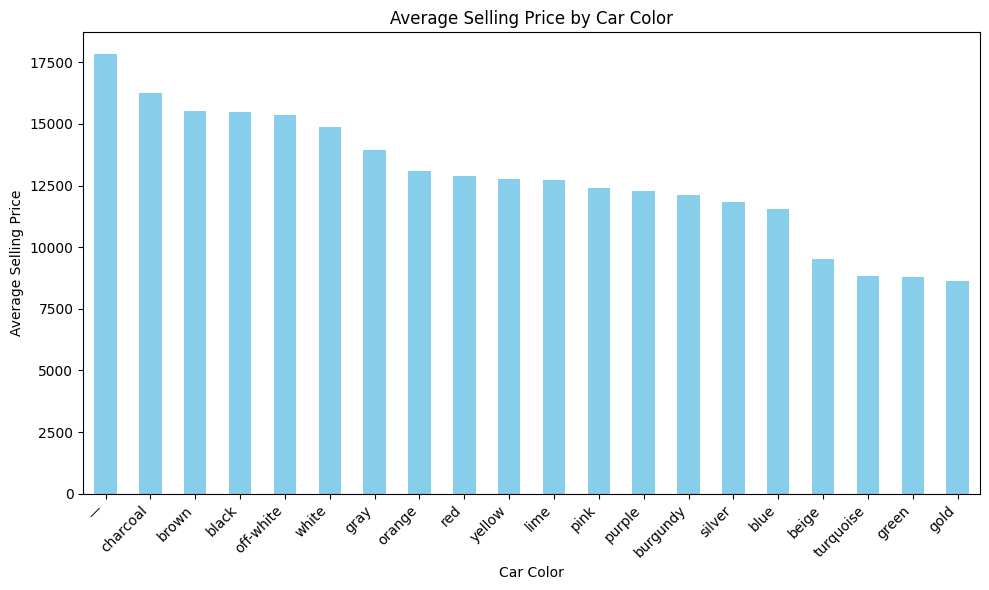

In [12]:
color_price = car_df.groupby('color')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
color_price.plot(kind='bar', color='skyblue', width = 0.5)
plt.title('Average Selling Price by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

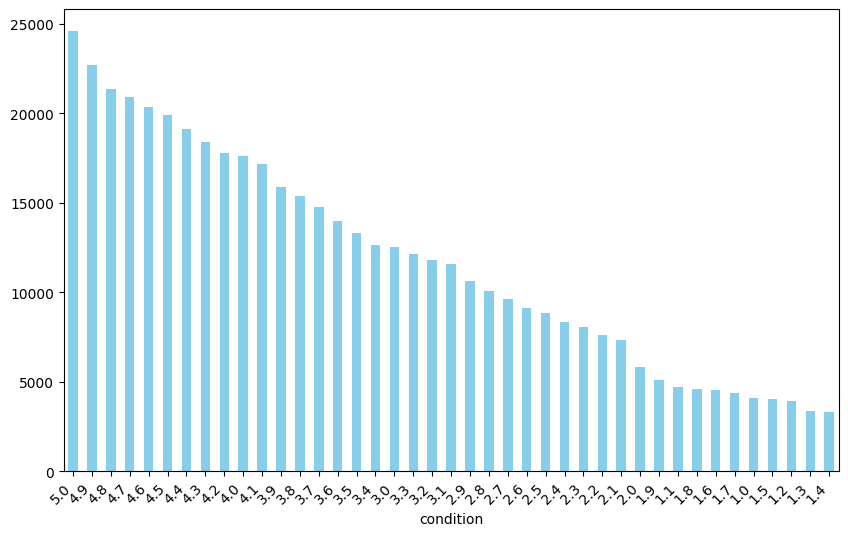

In [13]:
#Does the condition of the car determine the selling price? 
condition_price = car_df.groupby('condition')['sellingprice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
condition_price.plot(kind = 'bar', color = 'skyblue', width = 0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

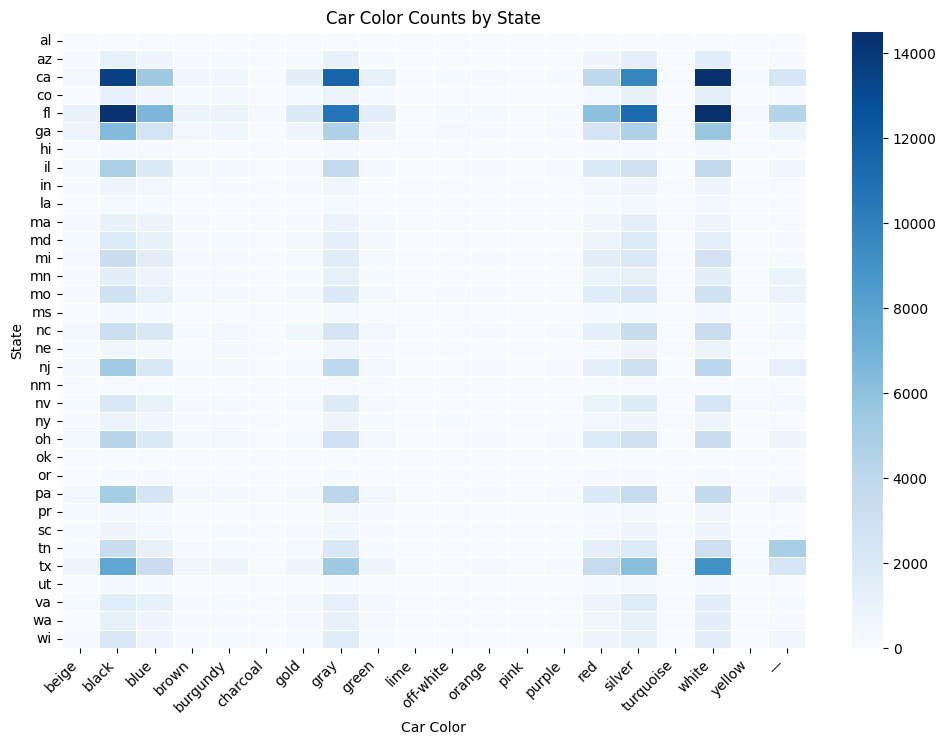

In [14]:
#Do states prefer a certain color? 

#heat map of the percentage of colors instead
state_color_counts = car_df.groupby(['state', 'color']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(state_color_counts, cmap='Blues', annot=False, linewidths=0.5)

plt.title('Car Color Counts by State')
plt.xlabel('Car Color')
plt.xticks(rotation=45, ha='right')
plt.ylabel('State')

plt.show()

#### Other potentially useful points of data for further analysis and understanding

In [15]:
#What month sells the most cars? 
car_df['month'] = pd.to_datetime(car_df['saledate']).dt.month
most_sales_month = car_df['month'].value_counts().idxmax()
print("the state with the most sales is: ")
print(most_sales_month)
#this needs to be converted to string

the state with the most sales is: 
2


In [16]:
#What state has the highest mileage cars sold on average?
highest_mileage_state = car_df.groupby('state')['odometer'].mean().idxmax()
print("the state with the highest mileage cars sold is: ")
print(highest_mileage_state)

the state with the highest mileage cars sold is: 
ok


In [17]:
#What year car is most common?
most_common_year = car_df['year'].value_counts().idxmax()
print("the most common year is: ")
print(most_common_year)

the most common year is: 
2013


In [18]:
#What make sells best overall?
best_selling_make = car_df['make'].value_counts().idxmax()
print("the best selling make is: ")
print(best_selling_make)

the best selling make is: 
Ford


In [19]:
#What seller makes up the most sales?
top_seller = car_df['seller'].value_counts().idxmax()
print("the top seller is: ")
print(top_seller)

the top seller is: 
ford motor credit company,llc


In [20]:
#What is the average condition of the cars? 
average_condition = car_df['condition'].mean()
print("the average condition is: ")
print(average_condition)

the average condition is: 
3.4265759967480776


In [21]:
# Which states have the highest selling price?
avg_price_by_state = car_df.groupby('state')['sellingprice'].mean().sort_values(ascending = False)
print("Average selling price by state type: ")
print(avg_price_by_state)

Average selling price by state type: 


state
tn    17285.152896
co    15745.498405
nv    15576.319380
il    15402.065854
mi    15182.068946
ca    14895.258650
mo    14694.777771
oh    14459.130975
fl    14331.417953
wa    14327.867798
mn    14313.545844
wi    14105.263810
pa    14007.944769
nj    13621.127896
tx    13574.509302
ne    13242.496608
ga    12840.065257
ny    12589.252685
ut    12491.601981
hi    12366.514523
az    12168.611403
or    11959.574976
ms    11502.419075
la    11159.715023
in    10959.654550
sc    10747.556473
pr     9755.170993
al     9440.000000
nc     8696.677967
va     8416.433651
md     7713.430892
ok     7448.148148
ma     6787.895249
nm     6479.754601
Name: sellingprice, dtype: float64


In [22]:
# What is the median selling price of cars by state?
median_price_by_state = car_df.groupby('state')['sellingprice'].median().sort_values(ascending= False)
print("Median selling price per state:")
print(median_price_by_state)

Median selling price per state:
state
tn    16200.0
co    14400.0
il    14300.0
mi    14000.0
nv    13800.0
wa    13500.0
mo    13500.0
mn    13000.0
fl    12900.0
pa    12800.0
oh    12700.0
wi    12500.0
ca    12500.0
nj    12200.0
tx    12000.0
hi    12000.0
ne    11900.0
ga    11400.0
ny    11200.0
or    11100.0
az    10900.0
ut    10750.0
ms    10400.0
in     9900.0
la     9900.0
sc     9700.0
pr     9000.0
al     7700.0
nc     7500.0
ok     7050.0
va     6900.0
md     6300.0
ma     5500.0
nm     3500.0
Name: sellingprice, dtype: float64


In [23]:
# What are the top 5 most common colors?
color_counts = car_df['color'].value_counts().head(5)
print("The top 5 most popular colors are:")
print(color_counts)

The top 5 most popular colors are:
color
black     93245
white     89236
silver    71255
gray      70643
blue      43060
Name: count, dtype: int64


In [24]:
# How does the condition affect price?
avg_price_by_condition = car_df.groupby('condition')['sellingprice'].mean()
print('Average selling price by condition:')
print(avg_price_by_condition)

Average selling price by condition:
condition
1.0     4111.261326
1.1     4706.202532
1.2     3909.593023
1.3     3381.081081
1.4     3292.672414
1.5     4043.965517
1.6     4556.622517
1.7     4354.784689
1.8     4603.362069
1.9     5109.652024
2.0     5829.778003
2.1     7308.003124
2.2     7630.034957
2.3     8042.682233
2.4     8307.436963
2.5     8814.351667
2.6     9120.273551
2.7     9627.166502
2.8    10084.069670
2.9    10651.454512
3.0    12514.027853
3.1    11596.347771
3.2    11784.984862
3.3    12144.131975
3.4    12657.212493
3.5    13290.605326
3.6    13964.990875
3.7    14786.358598
3.8    15357.547612
3.9    15893.327774
4.0    17621.004392
4.1    17138.325607
4.2    17791.508201
4.3    18408.087343
4.4    19118.495858
4.5    19892.982317
4.6    20366.419146
4.7    20881.720312
4.8    21377.920893
4.9    22686.269781
5.0    24582.617697
Name: sellingprice, dtype: float64


In [25]:
# How many cars are sold each month?
car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce')

car_df['sale_month'] = car_df['saledate'].dt.month
cars_per_month = car_df['sale_month'].value_counts().sort_index()
print("Number of cars sold each month:")
print(cars_per_month)


Number of cars sold each month:
sale_month
1     121399
2     142339
3      40647
4       1217
5      44231
6      84829
7       1074
12     36600
Name: count, dtype: int64


In [26]:
# What is the average selling price per car model?
price_avg_by_model = car_df.groupby('model')['sellingprice'].mean().sort_values(ascending=False)
print("The average selling price per car model: ")
print(price_avg_by_model.head(10))

The average selling price per car model: 
model
458 Italia                       183000.000000
SLS AMG GT                       156500.000000
i8                               154222.222222
Ghost                            153456.250000
California                       131846.153846
SLS AMG                          116016.666667
Gallardo                         111500.000000
Continental GTC Speed            111000.000000
F430                             106250.000000
Continental Flying Spur Speed    105750.000000
Name: sellingprice, dtype: float64


In [27]:
# What are the top 10 most expesnive selling cars?
highest_sellers = car_df.nlargest(10, 'sellingprice')
print(highest_sellers[['make','model', 'sellingprice']])
# Most of these vehicle models make sense, however the ford escape being the highest price does not.

                 make       model  sellingprice
289702           Ford      Escape        230000
463434        Ferrari  458 Italia        183000
377448  Mercedes-Benz     S-Class        173000
461254    Rolls-Royce       Ghost        171500
97864     Rolls-Royce       Ghost        169500
471468    Rolls-Royce       Ghost        169000
455044    Rolls-Royce       Ghost        167000
116910            BMW          i8        165000
235831            BMW          i8        165000
157460    Rolls-Royce       Ghost        163000


In [28]:
# It can be useful to see the percentage of vehicles that have an automatic transmission
transmission_percent = (car_df['transmission'] == 'automatic').mean()*100
print(f"The percentage of automatic transmission cars is %{transmission_percent:.2f}")
# This can be useful to determine if the non-automatic cars tend to be more or less expensive.

The percentage of automatic transmission cars is %96.54


In [29]:
# How many cars have been sold in each year?


cars_per_year = car_df['saledate'].dt.year.value_counts()
print(f"The amount of cars sold in each year is: \n{cars_per_year}")
# Overall a lot more cars were sold in 2015 than 2014

The amount of cars sold in each year is: 
saledate
2015    435547
2014     36789
Name: count, dtype: int64


In [30]:
# What is the average price for each car make?
price_avg_by_make = car_df.groupby('make')['sellingprice'].mean()
print("The average selling price for each make is: \n")
for make, price in price_avg_by_make.items():
    print(f"{make}: ${price:,.2f}")
# Rolls-Royce comes out as the most expensive selling make

The average selling price for each make is: 

Acura: $13,104.78
Aston Martin: $55,500.00
Audi: $20,010.17
BMW: $21,290.04
Bentley: $72,713.33
Buick: $10,588.18
Cadillac: $14,733.20
Chevrolet: $11,866.21
Chrysler: $10,627.36
Daewoo: $450.00
Dodge: $10,963.84
FIAT: $9,927.42
Ferrari: $128,852.94
Fisker: $46,461.11
Ford: $14,829.77
GMC: $16,769.47
Geo: $576.56
HUMMER: $15,404.61
Honda: $10,942.93
Hyundai: $11,061.26
Infiniti: $20,562.80
Isuzu: $1,774.16
Jaguar: $19,429.85
Jeep: $14,755.98
Kia: $11,766.67
Lamborghini: $111,500.00
Land Rover: $33,225.29
Lexus: $20,284.20
Lincoln: $17,547.19
Lotus: $40,800.00
MINI: $12,389.43
Maserati: $43,729.82
Mazda: $10,228.57
Mercedes-Benz: $21,314.87
Mercury: $3,996.94
Mitsubishi: $8,035.46
Nissan: $11,745.44
Oldsmobile: $953.77
Plymouth: $11,845.31
Pontiac: $3,814.86
Porsche: $38,932.11
Ram: $25,257.46
Rolls-Royce: $153,456.25
Saab: $3,616.35
Saturn: $3,436.38
Scion: $9,736.21
Subaru: $15,583.42
Suzuki: $4,009.77
Tesla: $67,054.35
Toyota: $12,422.46
V

In [31]:
# What percent of cars were sold in good condition?
good_condition_percent = (car_df['condition'] > 3.0).mean() * 100
print(f"The percent of cars sold in a good condition (> 3.0) is: %{good_condition_percent:.2f}")


The percent of cars sold in a good condition (> 3.0) is: %64.62


In [32]:
# How many cars in the dataset have high mileage (>100,000)?
high_mileage_cars = (car_df['odometer'] > 100000).sum()
print(f"The amount of high mileage cars (miles > 100,000) in the set is: {high_mileage_cars}")


The amount of high mileage cars (miles > 100,000) in the set is: 110299
